In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from numpy.random import seed
seed(42)

import tensorflow
tensorflow.random.set_seed(42)

In [3]:
import os
import pandas as pd
import math
import numpy as np

### Dataframes

In [4]:
REPOSITORY_PREFIX = 'https://raw.githubusercontent.com/RonildoSilva/datasets/main/'

In [5]:
df_train = pd.read_csv(REPOSITORY_PREFIX+'df_train_keras_tk_bpi_12_activity.csv')
df_test = pd.read_csv(REPOSITORY_PREFIX+'df_test_keras_tk_bpi_12_activity.csv')
df_val = pd.read_csv(REPOSITORY_PREFIX+'df_val_keras_tk_bpi_12_activity.csv')

In [6]:
df_train.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59',
       'datetime', 'Duration', 'PassedTime', 'Step', 'TimeConclusion'],
      dtype='object')

In [7]:
df_train = df_train[df_train['TimeConclusion'] != 0]
df_val = df_val[df_val['TimeConclusion'] != 0]
df_test = df_test[df_test['TimeConclusion'] != 0]

24 23 23


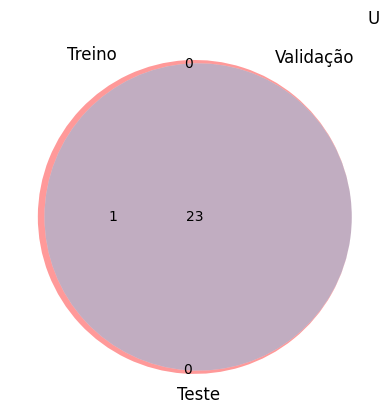

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [27]:
# Import the library
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

cols = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59']

set_train = set()
set_val = set()
set_test = set()

for col in cols:
  for i in df_train[col]:
    set_train.add(i)

for col in cols:
  for i in df_val[col]:
    set_val.add(i)

for col in cols:
  for i in df_test[col]:
    set_test.add(i)

set_train.remove(0)
set_val.remove(0)
set_test.remove(0)

print(
    len(set_train),
    len(set_val),
    len(set_test)
)

z = set_test.intersection(set_val).intersection(set_train)

w = set_train.intersection(set_val).difference(z)
x = set_val.intersection(set_test).difference(z)
y = set_test.intersection(set_train).difference(z)

a = set_train.difference(w.union(z).union(y))
b = set_val.difference(w.union(x).union(z))
c = set_test.difference(z.union(x).union(y))


l_a = len(a)
l_b = len(b)
l_c = len(c)
l_w = len(w)
l_x = len(x)
l_z = len(z)
l_y = len(y)

# Make the diagram
venn3(subsets = (l_a, l_b, l_w, l_c, l_y,l_x, l_z),
      set_labels = ('Treino', 'Validação', 'Teste', 'U'))
plt.title('U', loc='right')
plt.savefig('bpi_12_venn.pdf', bbox_inches='tight')
plt.show()

from google.colab import files
files.download('bpi_12_venn.pdf')

In [9]:
print(df_train['TimeConclusion'].std(),
df_val['TimeConclusion'].std(),
df_test['TimeConclusion'].std())

13.028249837563614 11.941496389818496 8.574387139583504


In [ ]:
MAX_LEN_TRACE_TRAIN = df_train['Step'].max()

In [ ]:
df_test['Step'].max()

54

### Features selection

In [ ]:
FEATURES_COL = df_train.columns.tolist()
FEATURES_COL.remove('TimeConclusion')
FEATURES_COL.remove('datetime')

TARGET_COL = 'TimeConclusion'

In [ ]:
ACT_COLS = df_train.columns.tolist()
ACT_COLS.remove('TimeConclusion')
ACT_COLS.remove('datetime')
ACT_COLS.remove('Duration')
ACT_COLS.remove('PassedTime')
ACT_COLS.remove('Step')

TARGET_COL = 'TimeConclusion'

In [ ]:
print(ACT_COLS, sep='')

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59']


In [ ]:
X_train = df_train[FEATURES_COL]
X_train = X_train.values

y_train = df_train[TARGET_COL].values


X_test = df_test[FEATURES_COL]
X_test = X_test.values

y_test = df_test[TARGET_COL].values


X_val = df_val[FEATURES_COL]
X_val = X_val.values

y_val = df_val[TARGET_COL].values

In [ ]:
X_train_ml = np.concatenate((X_train, X_val), axis=0)
y_train_ml = np.concatenate((y_train, y_val), axis=0)


In [ ]:
print(X_train.shape)

(80454, 63)


In [ ]:
print(X_train_ml.shape)

(109177, 63)


In [ ]:
! pip install lightgbm
! pip install xgboost

In [ ]:
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from xgboost import XGBRegressor
import lightgbm as ltb

regressors = [
        {'nome' : 'DummyRegressor', 'regressor':  DummyRegressor(strategy='mean')},
        {'nome': 'LinearRegression', 'regressor': LinearRegression(fit_intercept=False)},
        {'nome': 'RandomForestRegressor',  'regressor': RandomForestRegressor(n_estimators=20, max_features='auto',
                                                                              bootstrap=True, warm_start=True, max_depth=19, random_state=0)},
        {'nome' : 'XGBoostRegressor', 'regressor': XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)},
        {'nome' : 'LightGBM Regressor', 'regressor': ltb.LGBMRegressor(random_state=0)}
]

### ML Experiment

In [ ]:
ML_EXPERIMENT = True

In [ ]:
import numpy as np
import scipy.stats as st

def ci(data):
  #create 95% confidence interval for population mean weight
  return st.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=st.sem(data))


import time
from sklearn.metrics import mean_absolute_error
from google.colab import files

cols = [
        'Nome do modelo', 'MAE', 'CI'
       ]

data_result = []

for regressor in regressors:
    t1 = time.time()
    if(regressor['nome'] == 'LightGBM Regressor'):
      regr = regressor['regressor'].fit(X_train_ml, y_train_ml, categorical_feature=[i for i in range(0,MAX_LEN_TRACE_TRAIN+1)])
    else:
      regr = regressor['regressor'].fit(X_train_ml, y_train_ml)
    tf = time.time()

    y_pred = regr.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)

    int_conf = ci(abs(y_test - np.squeeze(y_pred)))

    line = [
        regressor['nome'],
        mae,
        int_conf
    ]

    data_result.append(line)

    df_results = pd.DataFrame(list(zip(y_test, np.squeeze(y_pred))),columns =['y_test', 'y_pred'])
    df_results.to_csv('Baseline BPI12_'+regressor['nome']+'.csv', index=False)
    files.download('Baseline BPI12_'+regressor['nome']+'.csv')


pd.DataFrame(data_result, columns=cols).sort_values(by='MAE', ascending=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Nome do modelo,MAE,CI
4,LightGBM Regressor,4.843656,"(4.7810959723066215, 4.906215504481954)"
2,RandomForestRegressor,4.894008,"(4.8234900131437515, 4.964525572221871)"
3,XGBoostRegressor,5.023329,"(4.956114654003979, 5.090543622049845)"
1,LinearRegression,6.033837,"(5.981762769011193, 6.085910942261829)"
0,DummyRegressor,7.641462,"(7.583691822935898, 7.699231776878446)"


LightGBM Regressor(4.9232540763208466, 5.016013700862501)


### Deep learning Experiment

Deep learning model definition

In [ ]:
#! pip install keras_self_attention

In [ ]:
#from keras_self_attention import SeqSelfAttention

In [ ]:
import keras

from tensorflow import keras
import tensorflow as tf

from keras.layers import Concatenate
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Bidirectional
from keras.layers import PReLU
from keras.layers import BatchNormalization
from keras.layers import Input
from keras.layers import Embedding
from keras.models import Model
from keras.layers import Flatten
from keras.layers import Masking

from tensorflow.keras.layers import concatenate

from keras.utils.vis_utils import plot_model
from keras.utils.vis_utils import model_to_dot

from keras.callbacks import EarlyStopping
from tqdm.keras import TqdmCallback


from keras.layers.core import Activation
from keras.initializers import Constant

from keras.regularizers import l2

In [ ]:
df_train['Step'].max()

59

In [ ]:
df_val['Step'].max()

56

In [ ]:
df_test['Step'].max()

54

In [ ]:
TIME_COLS = ['Duration', 'PassedTime', 'Step']

In [ ]:
dl_x_train = df_train[ACT_COLS].values
dl_x_val = df_val[ACT_COLS].values
dl_x_test = df_test[ACT_COLS].values

In [ ]:
dl_x_t_train = df_train[TIME_COLS].values
dl_x_t_val = df_val[TIME_COLS].values
dl_x_t_test = df_test[TIME_COLS].values

In [ ]:
dl_x_train = dl_x_train.reshape(dl_x_train.shape[0], dl_x_train.shape[1], 1)
dl_x_val = dl_x_val.reshape(dl_x_val.shape[0], dl_x_val.shape[1], 1)
dl_x_test = dl_x_test.reshape(dl_x_test.shape[0], dl_x_test.shape[1], 1)

In [ ]:
dl_x_t_train = dl_x_t_train.reshape(dl_x_t_train.shape[0], dl_x_t_train.shape[1], 1)
dl_x_t_val = dl_x_t_val.reshape(dl_x_t_val.shape[0], dl_x_t_val.shape[1], 1)
dl_x_t_test = dl_x_t_test.reshape(dl_x_t_test.shape[0], dl_x_t_test.shape[1], 1)

In [ ]:
n_activities = pd.concat([df_train, df_val, df_test], ignore_index=True)[ACT_COLS].to_numpy().max()

In [ ]:
n_activities

24

In [ ]:
shape = len(ACT_COLS)
shape_t = len(TIME_COLS)

- input_dim: Integer. Size of the vocabulary, i.e. maximum integer index + 1.
- output_dim: Integer. Dimension of the dense embedding.


In [ ]:
! pip install keras-self-attention

  Preparing metadata (setup.py) ... done
  Created wheel for keras-self-attention: filename=keras_self_attention-0.51.0-py3-none-any.whl size=18895 sha256=4c6b6b7940c565f9905dd00d1745f64954bb88c2e03c3619e90df6c82349dee7
  Stored in directory: /root/.cache/pip/wheels/b8/f7/24/607b483144fb9c47b4ba2c5fba6b68e54aeee2d5bf6c05302e
Successfully built keras-self-attention


In [ ]:
from keras_self_attention import SeqSelfAttention

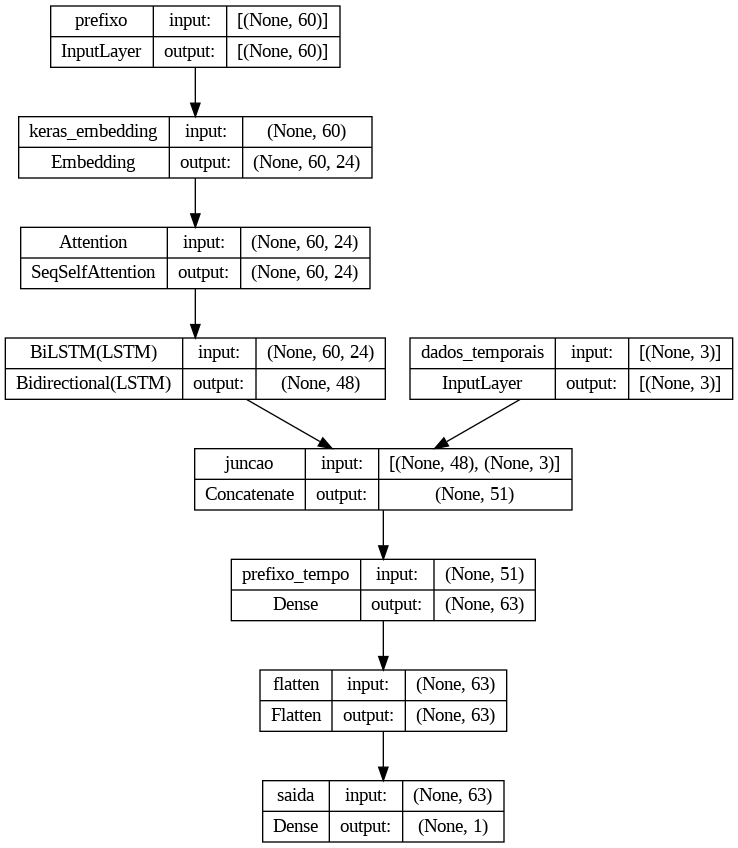

In [ ]:
seq_length = len(ACT_COLS)
seq_length_t = len(TIME_COLS)

input_dim = n_activities + 1

activity_input = Input(shape=(seq_length,), name='prefixo')
time_input = Input(shape=(shape_t,), name='dados_temporais')

embedding_size = n_activities

embedding = Embedding(output_dim=embedding_size,
                      input_dim=input_dim,
                      input_length=seq_length,
                      name='keras_embedding')(activity_input)

att = SeqSelfAttention(
    attention_width=embedding_size,
    attention_activation='relu',
    name='Attention')(embedding)

rnn = Bidirectional(LSTM(embedding_size,
                            dropout=0.1,
                            recurrent_dropout=0.1,
                            kernel_regularizer=keras.regularizers.l2(0.01), name='LSTM'),
                       name='BiLSTM')(att)


x = concatenate([rnn, time_input], name='juncao')

x = Dense((seq_length + seq_length_t),
          activation='relu',
          name='prefixo_tempo')(x)

x = Flatten()(x)
x = Dense(1, activation='linear', name='saida')(x)

model = Model(inputs=[activity_input , time_input], outputs=[x])

#model.summary()
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
nadam = keras.optimizers.Nadam(
    learning_rate=0.001, beta_1=0.7, beta_2=0.9, epsilon=1e-07, name="Nadam")

adam = keras.optimizers.Nadam(learning_rate=0.01, epsilon=0.01)

model.compile(
    optimizer=nadam,
    loss="mean_absolute_error",
    metrics=["mean_absolute_error"]
)

es = EarlyStopping(monitor='mean_absolute_error',
                   min_delta=1e-07, #min_delta=1e-04,
                   patience=50, verbose=1)

history = model.fit([dl_x_train, dl_x_t_train], y_train,
                    epochs=150,
                    batch_size=1200,
                    callbacks=[TqdmCallback(verbose=0), es],
                    validation_data=[[dl_x_val, dl_x_t_val], y_val],
                    verbose=0)

0epoch [00:00, ?epoch/s]

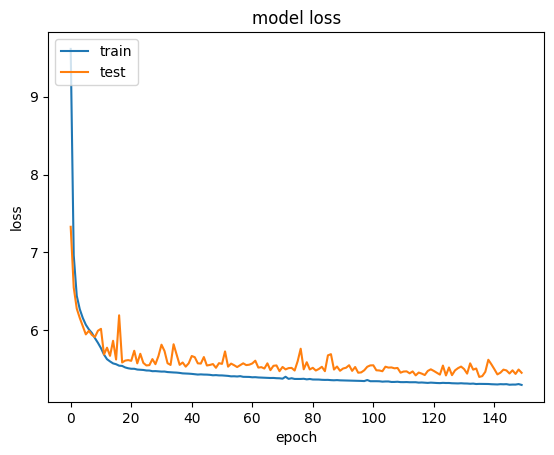

In [ ]:
import matplotlib.pyplot as plt

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
test_predicton = model.predict([dl_x_test,dl_x_t_test])

796/796 [==============================] - 29s 35ms/step


In [ ]:
test_predicton.shape

(25445, 1)

In [ ]:
y_test.shape

(25445,)

In [ ]:
mae_error = mean_absolute_error(y_test, test_predicton)
print(mae_error)

3.809395289466049


In [ ]:
from google.colab import files

df_results = pd.DataFrame(list(zip(y_test, np.squeeze(test_predicton))),columns =['y_test', 'y_pred'])
df_results.to_csv('A) BPI12_SA_BiLSTM_PRED_REAL.csv', index=False)

files.download('A) BPI12_SA_BiLSTM_PRED_REAL.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
MAX_STEP = df_test['Step'].max()

In [ ]:
MAX_STEP

54

In [ ]:
df_test['Step'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54])

In [ ]:
step = list()
mae = list()

for i in range(1, MAX_STEP+1):
  df_local_test = df_test[df_test['Step'] == i]
  dl_x__local_test = df_local_test[ACT_COLS].values
  dl_x_t_local_test = df_local_test[TIME_COLS].values

  y_local_test = df_local_test[TARGET_COL]
  local_test_predicton = model.predict([dl_x__local_test,dl_x_t_local_test])
  mae_error = mean_absolute_error(y_local_test, local_test_predicton)

  mae.append(mae_error)
  step.append(i)

TypeError: ignored

In [ ]:
for s, m in zip(step,mae):
  print(s,m)

In [ ]:
for s, m in zip(step,mae):
  print(str(round(m, 4)).replace('.',','))

In [ ]:
np.mean(mae)